

# ROI functional decoding

Perform meta-analytic functional decoding on regions of interest.

We can use the methods in ``nimare.decode.discrete`` to apply functional
characterization analysis to regions of interest or subsets of the Dataset.


In [30]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nimare
import nibabel as nib
from nilearn import datasets
from nimare.stats import pearson
from nimare.dataset import Dataset
from nimare.decode import discrete
from nimare.utils import get_resource_path
from nimare.extract import fetch_neurosynth
from nimare.io import convert_neurosynth_to_dataset
from nimare.decode import continuous
from nilearn import image
from nilearn.plotting import plot_roi
from nilearn.image import load_img
from nilearn.image import new_img_like
from nilearn import datasets, plotting
from nilearn.masking import _unmask_3d
from nilearn.maskers import nifti_spheres_masker
from nibabel import Nifti1Image
# from sklearn.utils import Bunch

Harvard-Oxford cortical atlas


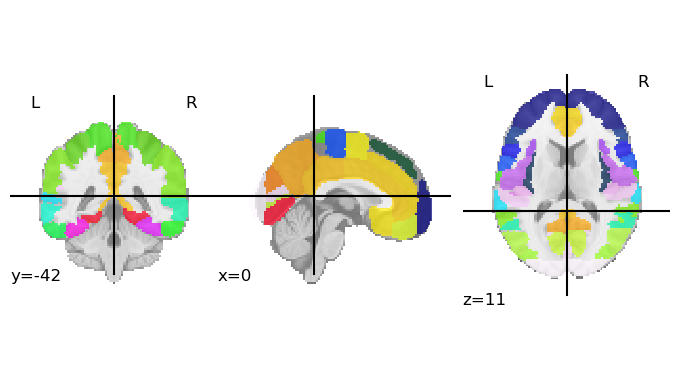

In [ ]:
## 从图谱中创建ROI
# atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# atlas_filename = atlas.maps
# atlas_filename = atlas.filename
# print("Atlas path: " + atlas_filename + "\n\n")

# # 绘制ROIs
# plot_roi(atlas_filename)
# print('Harvard-Oxford cortical atlas')

# # 打印标签
# # 创建一个图谱数据的Pandas数据框架，以便于检查
# atlas_labels_df = pd.DataFrame(atlas)
# print(atlas_labels_df['labels'])

## Create a region of interest
### 创建球形ROI

根据元分析结果得到的解剖区域创建ROI。

疾病组： 创建一个brain mask：
- Frontal pole （-6，58，18）

健康组： 创建五个brain mask
- Paracingulate Gyrus （0，48，8）
- Frontal Orbital Cortex （-38，24，-14）
- Cingulate Gyrus posterior division （-2，-54，26）
- Angular Gyrus （-44, -58，24）
- Frontal Orbital Cortex （32， 18, -18）

参考的neurostars 链接

> https://neurostars.org/t/how-to-interpret-results-of-nimare-decode-discrete-roiassociationdecoder/30190

In [31]:
# let's assume we are in MNI space
brain_mask = datasets.load_mni152_brain_mask()


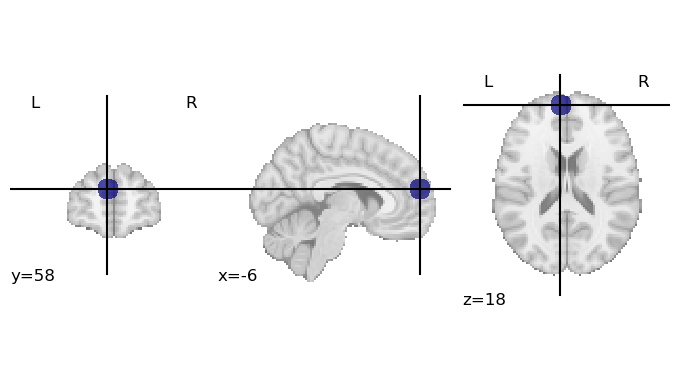

In [32]:
_, A = nifti_spheres_masker._apply_mask_and_get_affinity(
    seeds=[(-6, 58, 18)], # 疾病组ROI的中心坐标 
    niimg=None,
    radius=10,
    allow_overlap=False, 
    mask_img=brain_mask)

FPole_mask = _unmask_3d(
    X=A.toarray().flatten(), 
    mask=brain_mask.get_fdata().astype(bool))

FPole_mask = Nifti1Image(FPole_mask, brain_mask.affine)

nib.save(FPole_mask, "FPole.nii.gz")

# plot the result to make sure it makes sense
plotting.plot_roi("FPole.nii.gz")
plotting.show()

In [33]:
# get cognitive atlas data
import nimare.extract
databases = nimare.extract.download_cognitive_atlas(data_dir='../data', overwrite=False)

INFO:nimare.extract.utils:Dataset created in ../data/cognitive_atlas
/opt/anaconda3/lib/python3.12/site-packages/nimare/extract/utils.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return fuzz.ratio(tup[0], tup[1])
/opt/anaconda3/lib/python3.12/site-packages/nimare/extract/extract.py:399: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c

In [ ]:
ds = nimare.io.convert_neurosynth_to_dataset(
    coordinates_file=databases['coordinates'],
    metadata_file=databases['metadata'],
    annotations_files=databases['features']
    )

In [26]:
# get neurosynth data (Note: This can take a while!)
databases = nimare.extract.fetch_neurosynth(data_dir='../data')[0]


INFO:nimare.extract.utils:Dataset found in ../data/neurosynth

INFO:nimare.extract.extract:Searching for any feature files matching the following criteria: [('data-neurosynth', 'version-7')]


File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.


In [34]:
roi_img = nib.load("/Users/ss/Documents/psych_self_meta/results/demo/result/FPole.nii.gz")

In [28]:
# convert to NiMARE dataset (Note: This can take a while!)
ds = nimare.io.convert_neurosynth_to_dataset(
    coordinates_file=databases['coordinates'],
    metadata_file=databases['metadata'],
    annotations_files=databases['features']
    )


In [29]:
ds

Dataset(14371 experiments, space='mni152_2mm')

In [45]:
# decode ROI image (Note: This can take a while!)
# See: https://nimare.readthedocs.io/en/latest/decoding.html#discrete-decoding
decoder = nimare.decode.discrete.ROIAssociationDecoder(roi_img)
decoder.fit(ds)
decoded_df = decoder.transform()
print(decoded_df.iloc[60:80,:].to_string())

                                            r
feature                                      
terms_abstract_tfidf__aberrant       0.005204
terms_abstract_tfidf__abilities      0.001702
terms_abstract_tfidf__ability       -0.008102
terms_abstract_tfidf__able          -0.011715
terms_abstract_tfidf__abnormal       0.000039
terms_abstract_tfidf__abnormalities -0.020448
terms_abstract_tfidf__abnormality   -0.001974
terms_abstract_tfidf__absence       -0.006267
terms_abstract_tfidf__absent        -0.003648
terms_abstract_tfidf__abstract       0.005223
terms_abstract_tfidf__abuse          0.000231
terms_abstract_tfidf__acc            0.015682
terms_abstract_tfidf__access        -0.013718
terms_abstract_tfidf__accompanied    0.018793
terms_abstract_tfidf__accordance    -0.009411
terms_abstract_tfidf__according     -0.015745
terms_abstract_tfidf__accordingly    0.002904
terms_abstract_tfidf__account       -0.010944
terms_abstract_tfidf__accounted     -0.014115
terms_abstract_tfidf__accounts    

In [46]:
# 将解码后的 DataFrame 保存为 CSV 文件
decoded_df.to_csv('FPole_output.csv', index=True)

### 对解码结果进行可视化

## 健康组解码

健康组： 创建五个brain mask
- Paracingulate Gyrus （0，48，8）
- Frontal Orbital Cortex （-38，24，-14）
- Cingulate Gyrus posterior division （-2，-54，26）
- Angular Gyrus （-44, -58，24）
- Frontal Orbital Cortex （32， 18, -18）

注：对于Frontal Orbital Cortex （32， 18, -18） 并没有进行RO定义

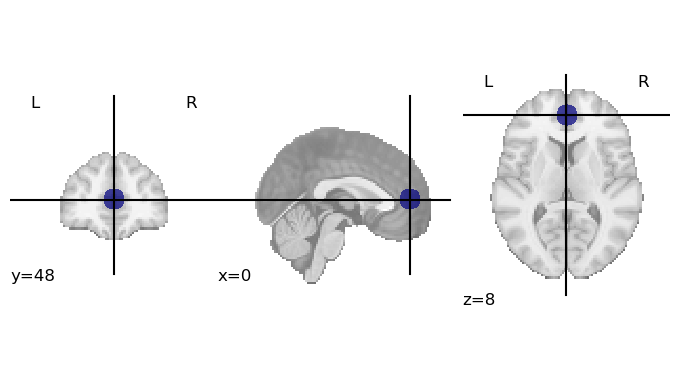

In [8]:
_, A = nifti_spheres_masker._apply_mask_and_get_affinity(
    seeds=[(0, 48, 8)], 
    niimg=None,
    radius=10,
    allow_overlap=False, 
    mask_img=brain_mask)

PCG_mask = _unmask_3d(
    X=A.toarray().flatten(), 
    mask=brain_mask.get_fdata().astype(bool))

PCG_mask = Nifti1Image(PCG_mask, brain_mask.affine)

nib.save(PCG_mask, "PCG.nii.gz")

# plot the result to make sure it makes sense
plotting.plot_roi("PCG.nii.gz")
plotting.show()

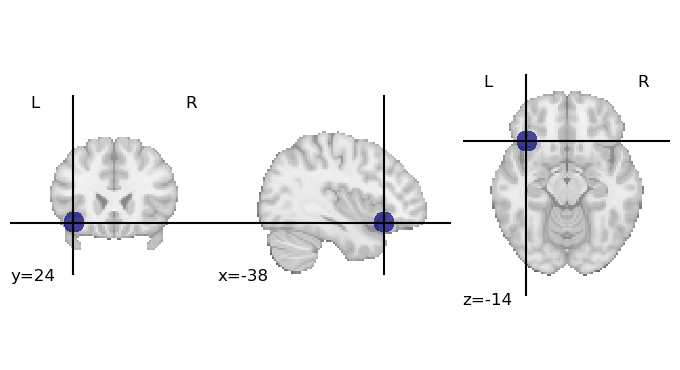

In [7]:
_, A = nifti_spheres_masker._apply_mask_and_get_affinity(
    seeds=[(-38, 24, -14)], 
    niimg=None,
    radius=10,
    allow_overlap=False, 
    mask_img=brain_mask)

FOC_mask = _unmask_3d(
    X=A.toarray().flatten(), 
    mask=brain_mask.get_fdata().astype(bool))

FOC_mask = Nifti1Image(FOC_mask, brain_mask.affine)

nib.save(FOC_mask, "FOC.nii.gz")

# plot the result to make sure it makes sense
plotting.plot_roi("FOC.nii.gz")
plotting.show()

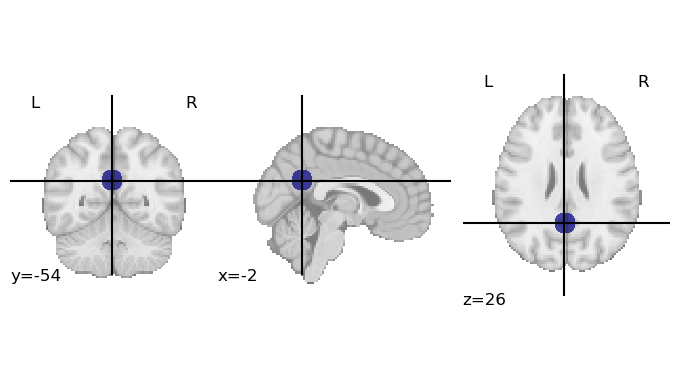

In [10]:
_, A = nifti_spheres_masker._apply_mask_and_get_affinity(
    seeds=[(-2, -54, 26)], 
    niimg=None,
    radius=10,
    allow_overlap=False, 
    mask_img=brain_mask)

Cingulate = _unmask_3d(
    X=A.toarray().flatten(), 
    mask=brain_mask.get_fdata().astype(bool))

Cingulate = Nifti1Image(Cingulate, brain_mask.affine)

nib.save(Cingulate, "Cingulate.nii.gz")

# plot the result to make sure it makes sense
plotting.plot_roi("Cingulate.nii.gz")
plotting.show()

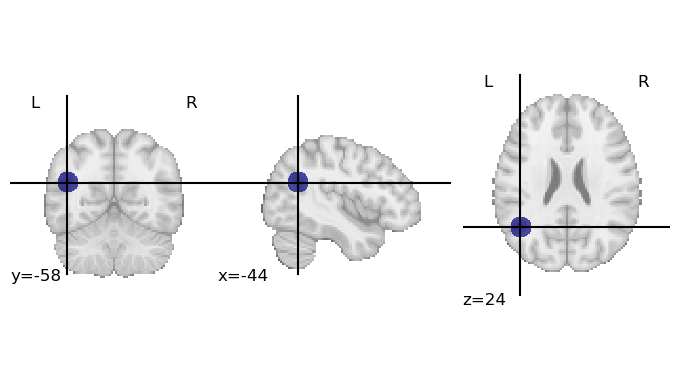

In [11]:
_, A = nifti_spheres_masker._apply_mask_and_get_affinity(
    seeds=[(-44, -58, 24)], 
    niimg=None,
    radius=10,
    allow_overlap=False, 
    mask_img=brain_mask)

Angular = _unmask_3d(
    X=A.toarray().flatten(), 
    mask=brain_mask.get_fdata().astype(bool))

Angular = Nifti1Image(Angular, brain_mask.affine)

nib.save(Angular, "Angular.nii.gz")

# plot the result to make sure it makes sense
plotting.plot_roi("Angular.nii.gz")
plotting.show()

In [ ]:
PCG_roi = nib.load("/Users/ss/Documents/psych_self_meta/results/demo/result/PCG.nii.gz")
FOC_roi = nib.load("/Users/ss/Documents/psych_self_meta/results/demo/result/FOC.nii.gz")
Cingulate_roi = nib.load("/Users/ss/Documents/psych_self_meta/results/demo/result/Cingulate.nii.gz")
Angular_roi = nib.load("/Users/ss/Documents/psych_self_meta/results/demo/result/Angular.nii.gz")


In [17]:
# convert to NiMARE dataset (Note: This can take a while!)
ds = nimare.io.convert_neurosynth_to_dataset(
    coordinates_file=databases['coordinates'],
    metadata_file=databases['metadata'],
    annotations_files=databases['features']
    )


In [18]:
# decode ROI image (Note: This can take a while!)
# See: https://nimare.readthedocs.io/en/latest/decoding.html#discrete-decoding
decoder = nimare.decode.discrete.ROIAssociationDecoder(PCG_roi)
decoder.fit(ds)
decoded_df = decoder.transform()
print(decoded_df.iloc[60:80,:].to_string())

                                            r
feature                                      
terms_abstract_tfidf__aberrant       0.034462
terms_abstract_tfidf__abilities     -0.006745
terms_abstract_tfidf__ability       -0.005831
terms_abstract_tfidf__able          -0.019732
terms_abstract_tfidf__abnormal       0.003023
terms_abstract_tfidf__abnormalities -0.000913
terms_abstract_tfidf__abnormality   -0.003376
terms_abstract_tfidf__absence       -0.017378
terms_abstract_tfidf__absent         0.000260
terms_abstract_tfidf__abstract      -0.013118
terms_abstract_tfidf__abuse          0.002042
terms_abstract_tfidf__acc            0.077646
terms_abstract_tfidf__access         0.002750
terms_abstract_tfidf__accompanied    0.002153
terms_abstract_tfidf__accordance    -0.006525
terms_abstract_tfidf__according     -0.017646
terms_abstract_tfidf__accordingly   -0.002908
terms_abstract_tfidf__account        0.009754
terms_abstract_tfidf__accounted      0.000525
terms_abstract_tfidf__accounts    

In [19]:
# 显示解码后的前十行
print(decoded_df.head(10).to_string())

# 将解码后的 DataFrame 保存为 CSV 文件
decoded_df.to_csv('PCG_decoded_output.csv', index=True)
### 对解码结果进行可视化

                                         r
feature                                   
terms_abstract_tfidf__001        -0.009686
terms_abstract_tfidf__01          0.006894
terms_abstract_tfidf__05         -0.005007
terms_abstract_tfidf__10          0.006610
terms_abstract_tfidf__100        -0.005211
terms_abstract_tfidf__11         -0.003097
terms_abstract_tfidf__12         -0.002416
terms_abstract_tfidf__12 healthy -0.004290
terms_abstract_tfidf__13          0.006667
terms_abstract_tfidf__14          0.001828


In [20]:
# decode ROI image (Note: This can take a while!)
# See: https://nimare.readthedocs.io/en/latest/decoding.html#discrete-decoding
decoder = nimare.decode.discrete.ROIAssociationDecoder(FOC_roi)
decoder.fit(ds)
decoded_df = decoder.transform()
print(decoded_df.iloc[60:80,:].to_string())


                                            r
feature                                      
terms_abstract_tfidf__aberrant       0.003428
terms_abstract_tfidf__abilities     -0.003262
terms_abstract_tfidf__ability        0.002214
terms_abstract_tfidf__able          -0.006795
terms_abstract_tfidf__abnormal      -0.024833
terms_abstract_tfidf__abnormalities -0.029462
terms_abstract_tfidf__abnormality   -0.003470
terms_abstract_tfidf__absence       -0.018845
terms_abstract_tfidf__absent        -0.002433
terms_abstract_tfidf__abstract       0.007287
terms_abstract_tfidf__abuse         -0.001154
terms_abstract_tfidf__acc            0.011462
terms_abstract_tfidf__access         0.022176
terms_abstract_tfidf__accompanied    0.004791
terms_abstract_tfidf__accordance    -0.021411
terms_abstract_tfidf__according      0.007328
terms_abstract_tfidf__accordingly   -0.001757
terms_abstract_tfidf__account        0.012517
terms_abstract_tfidf__accounted     -0.003291
terms_abstract_tfidf__accounts    

In [21]:
# 显示解码后的前十行
print(decoded_df.head(10).to_string())

# 将解码后的 DataFrame 保存为 CSV 文件
decoded_df.to_csv('FOC_decoded_output.csv', index=True)
### 对解码结果进行可视化

                                         r
feature                                   
terms_abstract_tfidf__001        -0.010516
terms_abstract_tfidf__01         -0.011325
terms_abstract_tfidf__05         -0.013796
terms_abstract_tfidf__10         -0.006793
terms_abstract_tfidf__100        -0.018792
terms_abstract_tfidf__11         -0.000012
terms_abstract_tfidf__12          0.004121
terms_abstract_tfidf__12 healthy -0.014321
terms_abstract_tfidf__13          0.004539
terms_abstract_tfidf__14         -0.003561


In [22]:
# decode ROI image (Note: This can take a while!)
# See: https://nimare.readthedocs.io/en/latest/decoding.html#discrete-decoding
decoder = nimare.decode.discrete.ROIAssociationDecoder(Cingulate_roi)
decoder.fit(ds)
decoded_df = decoder.transform()
print(decoded_df.iloc[60:80,:].to_string())


                                            r
feature                                      
terms_abstract_tfidf__aberrant       0.032655
terms_abstract_tfidf__abilities      0.011851
terms_abstract_tfidf__ability        0.020549
terms_abstract_tfidf__able          -0.014604
terms_abstract_tfidf__abnormal      -0.002407
terms_abstract_tfidf__abnormalities -0.017815
terms_abstract_tfidf__abnormality   -0.014902
terms_abstract_tfidf__absence        0.000102
terms_abstract_tfidf__absent        -0.004824
terms_abstract_tfidf__abstract       0.029827
terms_abstract_tfidf__abuse         -0.011511
terms_abstract_tfidf__acc           -0.016126
terms_abstract_tfidf__access        -0.006250
terms_abstract_tfidf__accompanied    0.012524
terms_abstract_tfidf__accordance    -0.014491
terms_abstract_tfidf__according     -0.006890
terms_abstract_tfidf__accordingly    0.011348
terms_abstract_tfidf__account       -0.006689
terms_abstract_tfidf__accounted     -0.024939
terms_abstract_tfidf__accounts    

In [23]:
# 显示解码后的前十行
print(decoded_df.head(10).to_string())

# 将解码后的 DataFrame 保存为 CSV 文件
decoded_df.to_csv('Cingulate_decoded_output.csv', index=True)
### 对解码结果进行可视化

                                         r
feature                                   
terms_abstract_tfidf__001        -0.007469
terms_abstract_tfidf__01          0.006858
terms_abstract_tfidf__05         -0.016032
terms_abstract_tfidf__10          0.000479
terms_abstract_tfidf__100        -0.000273
terms_abstract_tfidf__11         -0.002386
terms_abstract_tfidf__12         -0.010620
terms_abstract_tfidf__12 healthy  0.001757
terms_abstract_tfidf__13         -0.002420
terms_abstract_tfidf__14         -0.004931


In [24]:
# decode ROI image (Note: This can take a while!)
# See: https://nimare.readthedocs.io/en/latest/decoding.html#discrete-decoding
decoder = nimare.decode.discrete.ROIAssociationDecoder(Angular_roi)
decoder.fit(ds)
decoded_df = decoder.transform()
print(decoded_df.iloc[60:80,:].to_string())

                                            r
feature                                      
terms_abstract_tfidf__aberrant       0.005427
terms_abstract_tfidf__abilities     -0.003506
terms_abstract_tfidf__ability        0.009946
terms_abstract_tfidf__able           0.006701
terms_abstract_tfidf__abnormal      -0.021822
terms_abstract_tfidf__abnormalities -0.022608
terms_abstract_tfidf__abnormality   -0.013871
terms_abstract_tfidf__absence        0.000074
terms_abstract_tfidf__absent         0.006337
terms_abstract_tfidf__abstract       0.022899
terms_abstract_tfidf__abuse         -0.006263
terms_abstract_tfidf__acc           -0.017782
terms_abstract_tfidf__access         0.029665
terms_abstract_tfidf__accompanied    0.018213
terms_abstract_tfidf__accordance    -0.013495
terms_abstract_tfidf__according      0.000546
terms_abstract_tfidf__accordingly    0.010909
terms_abstract_tfidf__account       -0.001109
terms_abstract_tfidf__accounted     -0.014681
terms_abstract_tfidf__accounts    

In [25]:
# 显示解码后的前十行
print(decoded_df.head(10).to_string())

# 将解码后的 DataFrame 保存为 CSV 文件
decoded_df.to_csv('Angular_decoded_output.csv', index=True)
### 对解码结果进行可视化

                                         r
feature                                   
terms_abstract_tfidf__001        -0.014670
terms_abstract_tfidf__01         -0.001939
terms_abstract_tfidf__05         -0.027644
terms_abstract_tfidf__10         -0.012953
terms_abstract_tfidf__100        -0.000720
terms_abstract_tfidf__11         -0.013418
terms_abstract_tfidf__12         -0.008917
terms_abstract_tfidf__12 healthy  0.010541
terms_abstract_tfidf__13         -0.004070
terms_abstract_tfidf__14         -0.004532


1. r代表的含义
2. fengchunliang老师文章里的雷达图的数值代表的是什么
3. neurosynth 文章

## 使用word cloud 进行可视化

In [3]:
import os

from os import path
from wordcloud import WordCloud

In [6]:
word_path = "/Users/ss/Documents/psych_self_meta/results/demo/result/decoded_output.csv"
df = pd.read_csv(word_path)

In [14]:
data_60 = "/Users/ss/Documents/psych_self_meta/results/demo/results/60.csv"
da = pd.read_csv(data_60)

In [17]:
keywords = da.iloc[:, :16].dropna().values.flatten().tolist()

['sequences',
 'sequences',
 'timing',
 'alpha',
 'sequence',
 'duration',
 'beta',
 'rhythm',
 'motor',
 'rhythms',
 'intervals',
 'beat',
 'interval',
 'pg',
 'sequential',
 'regular',
 'sex',
 'women',
 'sex',
 'females',
 'males',
 'male',
 'female',
 'sexual',
 'ts',
 'cycle',
 'menstrual',
 'testosterone',
 'infant',
 'hf',
 'luteal',
 'girls',
 'game',
 'acupuncture',
 'game',
 'unfair',
 'er',
 'stimulation',
 'offers',
 'playing',
 'acupoint',
 'cooperation',
 'social',
 'provocation',
 'acceptance',
 'fairness',
 'played',
 'players',
 'errors',
 'error',
 'errors',
 'monitoring',
 'correct',
 'feedback',
 'creative',
 'creativity',
 'driving',
 'incorrect',
 'adjustments',
 'outcome',
 'generation',
 'ideas',
 'adjustment',
 'rates',
 'speech',
 'speech',
 'auditory',
 'sounds',
 'sound',
 'perception',
 'voice',
 'acoustic',
 'listening',
 'pitch',
 'production',
 'prosody',
 'tones',
 'tinnitus',
 'speaker',
 'phonetic',
 'emotion',
 'emotional',
 'emotion',
 'regulation',

In [18]:
# 定义筛选函数：如果feature列包含任意关键词，则保留该行
def contains_keywords(feature, keywords):
    for keyword in keywords:
        if keyword in feature:
            return True
    return False

In [22]:
# 筛选da中符合条件的行
filtered_df = df[df['feature'].apply(lambda x: contains_keywords(str(x), keywords))]

# 保存结果到新的CSV3
filtered_df.to_csv('/Users/ss/Documents/psych_self_meta/results/demo/results/df_re.csv', index=False)

print("筛选完成，结果已保存到df_re.csv")

筛选完成，结果已保存到df_re.csv


In [23]:
filtered_df

,feature,r
0,terms_abstract_tfidf__001,-0.011373
1,terms_abstract_tfidf__01,0.000216
2,terms_abstract_tfidf__05,-0.012524
3,terms_abstract_tfidf__10,-0.003522
4,terms_abstract_tfidf__100,-0.016434
...,...,...
3973,LDA400_abstract_weight__395_hr_physiological_h...,-0.004706
3974,LDA400_abstract_weight__396_human_humans_animal,-0.025363
3975,LDA400_abstract_weight__397_performance_impair...,-0.012181
3976,LDA400_abstract_weight__398_dlpfc_prefrontal_c...,-0.000673


In [7]:
# 2. 读取txt中的词汇
with open('/Users/ss/Documents/psych_self_meta/results/demo/results/v4-topics-60 (1).txt', 'r', encoding='utf-8') as f:
    words = f.read().splitlines()

In [9]:
# 3. 筛选表格中包含这些词的行
filtered_df = df[df['feature'].apply(lambda x: any(word in x for word in words))]


In [13]:
filtered_df

,feature,r


In [11]:
# 4. 根据相关系数（r列）绘制词云图
# 假设相关系数在r列，并且相关系数值越高词云中的词汇大小越大
word_freq = dict(zip(filtered_df['feature'], filtered_df['r']))


In [12]:
# 创建词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [5]:
word_freq = dict(zip(data1['feature'], data1['r']))


In [37]:
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate_from_frequencies(word_freq)


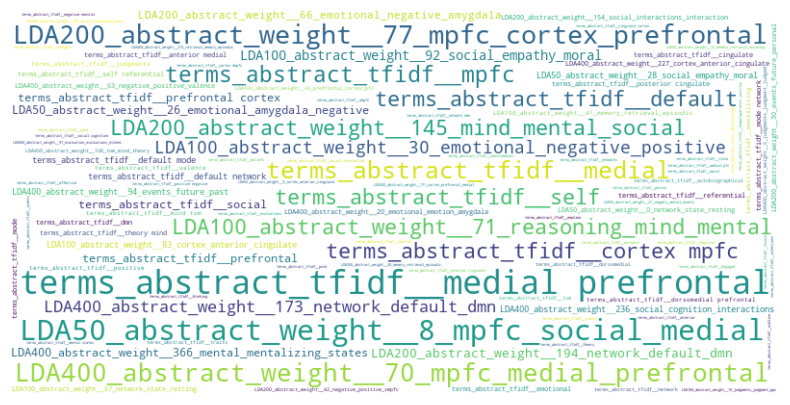

In [38]:
# 使用 matplotlib 显示生成的图像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()